# Combining Discrete and Continuous Layers

This notebook demonstrates how to position continuous elements like background bands (`geom_band`) and annotations (`geom_text`) relative to discrete elements like bars.

When positioning continuous elements, keep in mind numeric equivalents of the discrete positions: in this example `0.0` for 'Outback' through `7.0` for 'Pacer'.


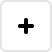
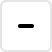
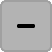
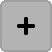
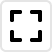
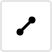
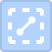
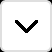
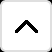
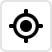
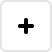
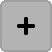
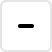
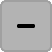
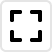
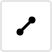
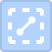
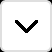
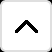
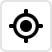

In [1]:
from lets_plot import *

LetsPlot.setup_html()

In [2]:
import numpy as np
import pandas as pd


In [3]:
np.random.seed(69)

cars = pd.DataFrame({
    'Models': ['Outback', 'Impresa', 'BRZ', 'Jetta', 'Passat', 'Matador', 'Rambler', 'Pacer'],
    'Val': np.random.uniform(0,100, size=8),
})

# Data to use in `geom_band` and `geom_text` layers
cars_band = pd.DataFrame({
    'Brand': ['Subaru', 'Volkswagen', 'AMC'],
    'pos_minx': [-0.5, 2.5, 4.5],
    'pos_maxx':[2.5, 4.5, 7.5],
    'M':['#41DC8E', '#E0FFFF','#90D5FF']
})


In [4]:
p = (
    ggplot(cars, aes(x='Models', weight='Val'))
    + geom_band(aes(xmin='pos_minx', xmax='pos_maxx', fill='Brand', color='Brand'),
                data=cars_band,
                tooltips='none',
                alpha=0.5)
    + geom_text(aes(x='pos_minx', label='Brand'), y=100,
                data=cars_band, 
                size=8, fontface='bold', 
                hjust='left', 
                nudge_x=0.1)
    + geom_bar()
    + scale_fill_manual(values=cars_band.M)
    + scale_color_manual(values=cars_band.M)
    + theme(legend_position='none', axis_title_x='blank')
    + ggsize(700, 400)
)

p